In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
# Data preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

100.0%
100.0%
100.0%
100.0%


In [4]:
# improved mlp model
class ImprovedMLP(nn.Module):
    def __init__(self):
        super(ImprovedMLP, self).__init__()
        self.flatten = nn.Flatten()  # Flatten 28x28 image into 784
        self.model = nn.Sequential(
            nn.Linear(784, 256),   # Input layer → Hidden layer 1
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),       # Dropout for regularization

            nn.Linear(256, 128),   # Hidden layer 1 → Hidden layer 2
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),    # Hidden layer 2 → Hidden layer 3
            nn.ReLU(),

            nn.Linear(64, 10)      # Final output layer for 10 classes
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.model(x)


In [5]:
# Model Initialization, Loss, and Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ImprovedMLP().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
# training loop 
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()        # Reset gradients
        outputs = model(images)      # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()              # Backpropagation
        optimizer.step()             # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1/10, Loss: 0.5439
Epoch 2/10, Loss: 0.4081
Epoch 3/10, Loss: 0.3742
Epoch 4/10, Loss: 0.3511
Epoch 5/10, Loss: 0.3372
Epoch 6/10, Loss: 0.3206
Epoch 7/10, Loss: 0.3138
Epoch 8/10, Loss: 0.3039
Epoch 9/10, Loss: 0.2931
Epoch 10/10, Loss: 0.2846


In [7]:
# Evaluation on Test Data
model.eval()
correct = 0
total = 0

with torch.no_grad():  # Inference mode (no gradients)
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 88.52%


In [8]:
import matplotlib.pyplot as plt


In [9]:
# for visualization
train_losses = []
test_accuracies = []
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluate on test set after each epoch
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{epochs} | Loss: {avg_loss:.4f} | Test Accuracy: {accuracy:.2f}%")


Epoch 1/10 | Loss: 0.2779 | Test Accuracy: 88.50%
Epoch 2/10 | Loss: 0.2728 | Test Accuracy: 89.09%
Epoch 3/10 | Loss: 0.2657 | Test Accuracy: 89.27%
Epoch 4/10 | Loss: 0.2607 | Test Accuracy: 89.27%
Epoch 5/10 | Loss: 0.2540 | Test Accuracy: 89.48%
Epoch 6/10 | Loss: 0.2483 | Test Accuracy: 89.42%
Epoch 7/10 | Loss: 0.2464 | Test Accuracy: 89.26%
Epoch 8/10 | Loss: 0.2428 | Test Accuracy: 88.97%
Epoch 9/10 | Loss: 0.2353 | Test Accuracy: 89.45%
Epoch 10/10 | Loss: 0.2344 | Test Accuracy: 89.41%


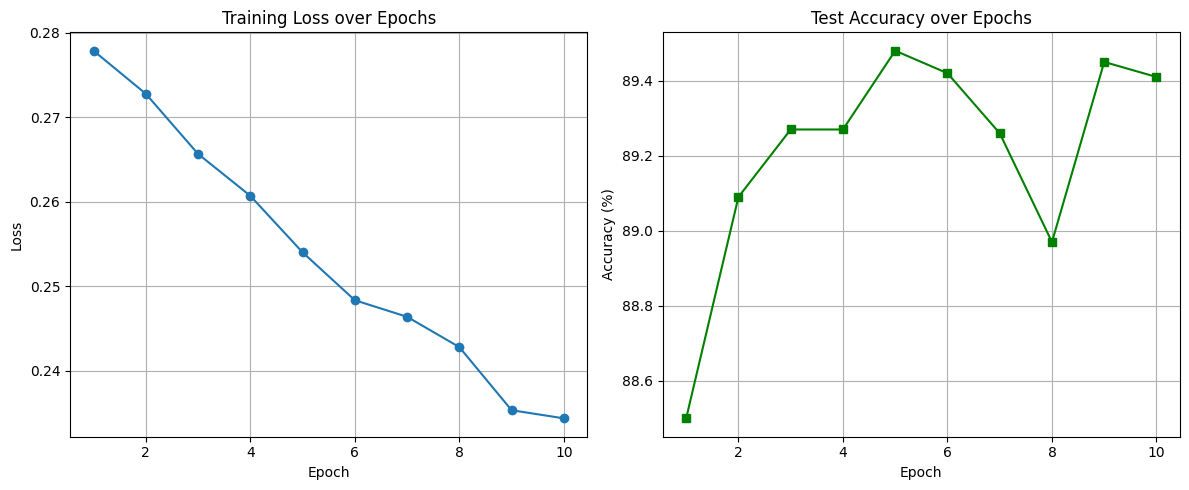

In [10]:
# Plotting Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), test_accuracies, marker='s', color='green')
plt.title('Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()
